In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

random.seed(42)



In [2]:
df = pd.read_csv('ab_data.csv')

df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.count()

user_id         294478
timestamp       294478
group           294478
landing_page    294478
converted       294478
dtype: int64

In [4]:
df.shape

(294478, 5)

In [5]:
df['user_id'].value_counts

<bound method IndexOpsMixin.value_counts of 0         851104
1         804228
2         661590
3         853541
4         864975
           ...  
294473    751197
294474    945152
294475    734608
294476    697314
294477    715931
Name: user_id, Length: 294478, dtype: int64>

In [6]:
session_counts = df['user_id'].value_counts(ascending=False)
multi_users = session_counts[session_counts > 1].count()

print('There are %s users that appear multiple times in the dataset' % (multi_users))

There are 3894 users that appear multiple times in the dataset


In [7]:
df.converted

0         0
1         0
2         0
3         0
4         1
         ..
294473    0
294474    0
294475    0
294476    0
294477    0
Name: converted, Length: 294478, dtype: int64

In [8]:
df.converted.mean()

0.11965919355605512

In [ ]:
#方法1
df.query('landing_page == "new_page" and group == "control"').count()[0] + 
df.query('landing_page == "old_page" and group == "treatment"').count()[0]

In [ ]:
# 过滤出new page 和 control 的数据
npcontrol = df[(df.landing_page == "new_page") & (df.group == "control")]

# 过滤出 old page 和 treatment 的数据
optreatment = df[(df.landing_page == "old_page") & (df.group == "treatment")]


In [9]:
#方法2
pd.crosstab(df['group'], df['landing_page'])
# 把左上和右下相加 结果和上面是一样的 
#只需要验证 control old_page和treatment new_page两组数据比较，其他为干扰数据，要清洗

landing_page,new_page,old_page
group,,
control,1928,145274
treatment,145311,1965


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [11]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [12]:
# 过滤出new page 和 control 的数据
npcontrol = df[(df.landing_page == "new_page") & (df.group == "control")]

# 过滤出 old page 和 treatment 的数据
optreatment = df[(df.landing_page == "old_page") & (df.group == "treatment")]

#合并结果集（重要！！）
inaccurate = pd.concat([npcontrol, optreatment])

#合并找出index，再删除
inaccurate_index = inaccurate.index

# 创建df2 去掉不需要的数据
df2 = df.drop(inaccurate_index)

In [13]:
# 再次检查一下 上面的 3893行数据是否已被移除
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]


0

In [14]:
df2['user_id'].nunique()

290584

In [15]:
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [16]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [17]:
df2.drop(labels = 1899, axis=0, inplace=True)

In [18]:
df2['converted'].mean()

0.11959708724499628

In [19]:
df2[df2['group'] == "control"]['converted'].mean()

0.1203863045004612

In [20]:
df2[df2['group'] == "treatment"]['converted'].mean()

0.11880806551510564

In [21]:
(df2.landing_page == "new_page").mean()

0.5000619442226688

In [22]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

In [23]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

In [24]:
n_new = df2.query('group == "treatment"')['user_id'].count()
n_new = int(n_new)
n_new

145310

In [25]:
n_old = df2.query('group == "control"')['user_id'].count()
n_old = int(n_old)
n_old

145274

In [26]:
new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
new_page_converted.shape

(145310,)

In [41]:
old_page_converted = np.random.binomial(1, p_old,n_old)
old_page_converted

array([0, 1, 0, ..., 0, 0, 0])

In [42]:
old_page_converted.shape

(145274,)

In [43]:
new_page_converted = new_page_converted[:145274]
new_page_converted.mean() - old_page_converted.mean()

-0.0005300329033412626

In [44]:
p_diffs = []

for _ in range(2000):
    new_page_converted = np.random.binomial(1, p_new, n_new)
    old_page_converted = np.random.binomial(1, p_old, n_old)
    new_page_p = new_page_converted.mean()
    old_page_p = old_page_converted.mean()
    p_diffs.append(new_page_p - old_page_p)

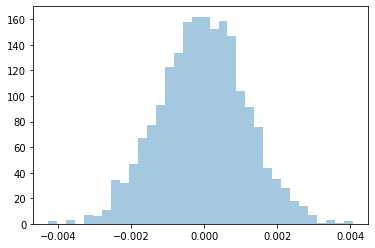

In [45]:
sns.distplot(p_diffs, hist=True, kde=False)

plt.show()

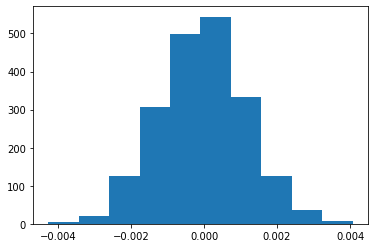

In [46]:
plt.hist(p_diffs);

In [ ]:
所以H0正确，实验组和对照组差不多

In [47]:
actual_diff = (df2[df2['group'] == "treatment"]['converted'].mean()) - (df2[df2['group'] == "control"]['converted'].mean())
actual_diff

-0.0015782389853555567

In [48]:
p_diffs = np.array(p_diffs)
(p_diffs > actual_diff).mean()

0.898

In [ ]:
p值是概率的随机度。p-value等于 一个情况的概率加上跟他同概率或者更小情况的概率。
证明是否稀有，<0.05稀有  >0.05不稀有
题中p=0.898，所以H0（AB一样的情况）很正常普通，无法驳回